## 01. [02-1 Image Captioning] 파일 참조 (코드 동일)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3
import tensorflow.keras.preprocessing.image
from tensorflow.keras.layers import (LSTM, Embedding,TimeDistributed, Dense, RepeatVector,Activation, Flatten, Reshape, concatenate,  
                                    Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import Input, layers, optimizers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import add

from PIL import Image


In [ ]:
# pickle 파일 형태로 저장된 dict 불러오기

with open('idxtoword.pkl', 'rb') as f:
    idxtoword = pickle.load(f)
    
with open('wordtoidx.pkl', 'rb') as f:
    wordtoidx = pickle.load(f)
    
with open('embedding_matrix.pkl', 'rb') as f:
    embedding_matrix= pickle.load(f)

In [ ]:
# 엔코딩 & 캡셔닝 모델 불러오기

caption_model = tf.keras.models.load_model('caption_model_django.h5')
encode_model = tf.keras.models.load_model('encode_model.h5')

In [ ]:
def encodeImage(img):
    img = img.resize((299, 299), Image.ANTIALIAS)
    x = tensorflow.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tensorflow.keras.applications.inception_v3.preprocess_input(x)
    x = encode_model.predict(x)
    x = np.reshape(x, 2048)
    return x


def generateCaption(photo):
    in_text = 'STARTSEQ'
    for i in range(49):
        sequence = [wordtoidx[w] for w in in_text.split() if w in wordtoidx]
        sequence = pad_sequences([sequence], maxlen=49)
        yhat = caption_model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idxtoword[yhat]
        in_text += ' ' + word
        if word == 'STOPSEQ':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

def printCaption(path):
    img = tensorflow.keras.preprocessing.image.load_img(path, target_size=(299, 299))
    image = encodeImage(img).reshape((1,2048))
    x = plt.imread(path)
    plt.imshow(x)
    plt.show()
    print("Predicted Caption:",generateCaption(image))

## 02. 동영상 캡션 생성

In [ ]:
import cv2

def videoCaption(path):

    vidcap = cv2.VideoCapture(path)
    count = 0
    image_path = []

    while vidcap.isOpened():
        success, image = vidcap.read() # True, np.array 
        if success is True: 
            if int((vidcap.get(1))%30==0): # 30은 fps (frame per second)로, 24, 29.7, 30, 60등 다양하게 있으나 편의상 30으로 설정
                path = "images/frame%d.jpg" % count # 이미지 캡쳐본 늘려가며 숫자 증가
                cv2.imwrite(path, image) # images/frame1.jpg, 캡쳐된 이미지 
                image_path.append(path) # 캡쳐된 이미지 경로 list 에 추가
                count+=1
        else:
            break
    vidcap.release()
    
    for image in image_path: # list 에 저장된 이미지 경로를 추출하여 캡셔닝 진행ㄴ
        printCaption(image)

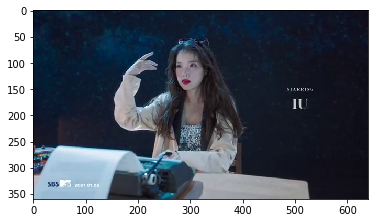

Predicted Caption: woman is holding an umbrella in her hand


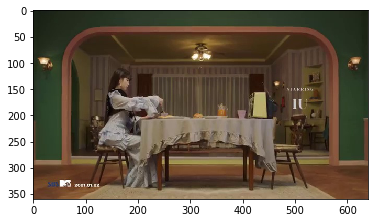

Predicted Caption: living room with furniture and chairs


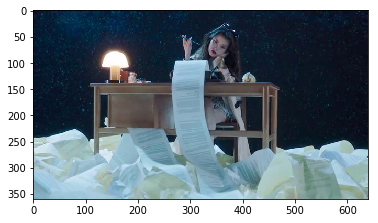

Predicted Caption: woman is sitting on table with her cake


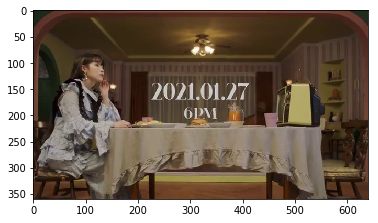

Predicted Caption: group of people sitting around table with food


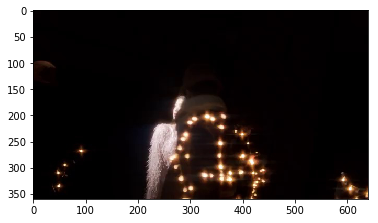

Predicted Caption: large white fire hydrant sitting on top of street


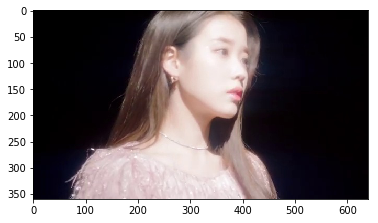

Predicted Caption: woman holding an umbrella in front of mirror


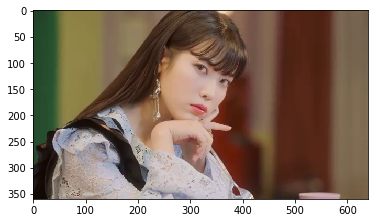

Predicted Caption: woman is holding her cell phone while she is holding her teeth


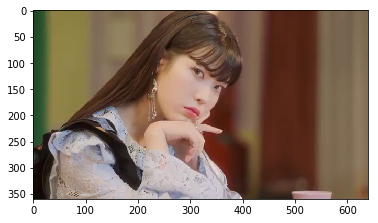

Predicted Caption: woman is holding her cell phone while she is holding her teeth


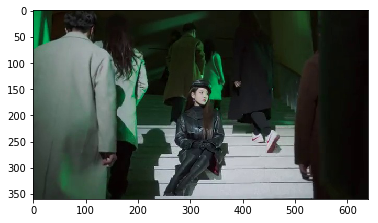

Predicted Caption: man in suit and tie is standing next to woman


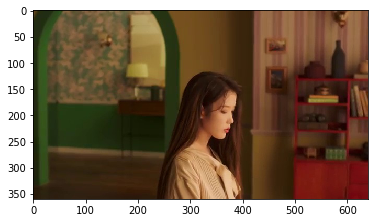

Predicted Caption: woman is holding wii controller in her hand


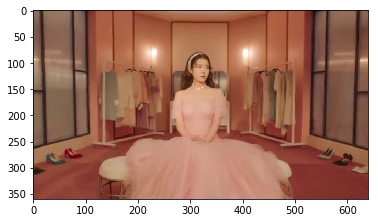

Predicted Caption: woman is standing in front of large white cake


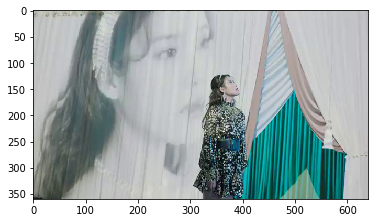

Predicted Caption: woman standing next to woman holding an umbrella


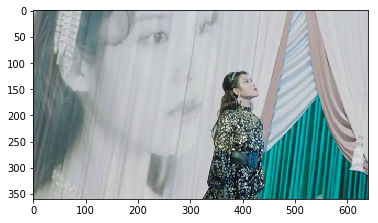

Predicted Caption: woman is holding an umbrella in front of building


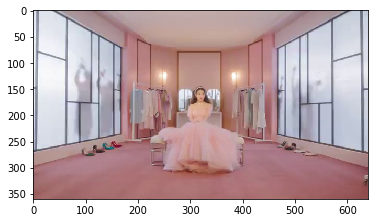

Predicted Caption: bathroom with white walls and white walls


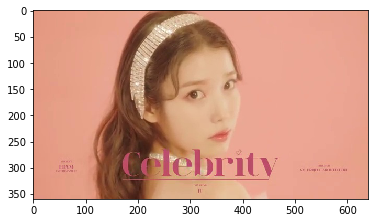

Predicted Caption: woman holding her cell phone while holding her cell phone


KeyboardInterrupt: 

In [ ]:
videoCaption('video_iu.mp4')